<font size=5>Responsible Machine Learning, July 2023</font>

By Aijun Zhang

This demo (based on BikeSharing data) covers:

- Intro to PiML and Data Dashboard

- Post-hoc Explainability Tools/Puzzles

- FANOVA-Interpretable Models: EBM and GAMI-Net


# Initialize PiML Experiment

In [1]:
!pip install piml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=d48a2b9cf369305b808756aff177e56416bf137779022f6c25ea5801935754aa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
from piml import Experiment
exp = Experiment()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Load and Prepare Data

In [3]:
# Choose BikeSharing
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [4]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [5]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [6]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Post-hoc Explainability Pitfalls

## Example 1: XGBoost Model

In [7]:
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=7, n_estimators=500)
exp.model_train(model, name='XGBoost')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [8]:
# Check model performance
exp.model_diagnose(model="XGBoost", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

MSE     MAE       R2
                              
Train  0.0000  0.0045   0.9986
Test   0.0019  0.0276   0.9457
Gap    0.0019  0.0231  -0.0529

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

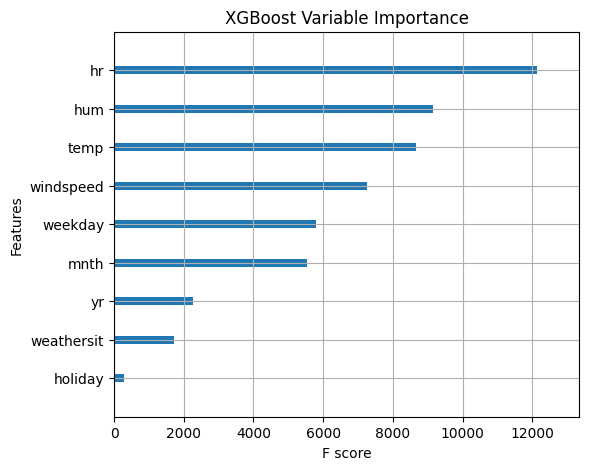

In [11]:
# Tree-based Variable Importance
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)

feature_names = exp.get_feature_names()
model.get_booster().feature_names = feature_names
xgb.plot_importance(model, title="XGBoost Variable Importance", show_values=False)
plt.show()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

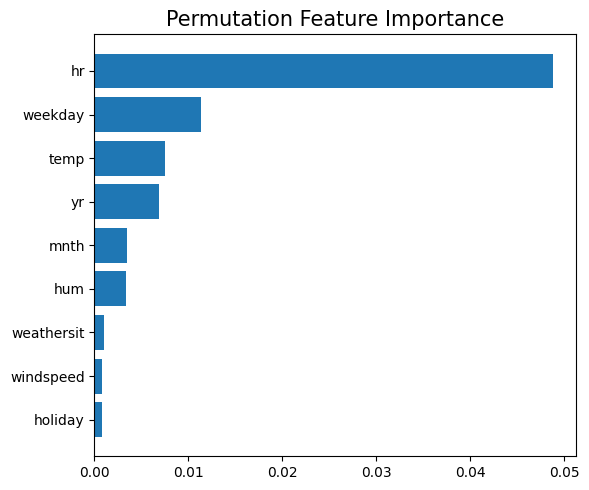

In [12]:
# Permutation Feature Importance
exp.model_explain(model='XGBoost', show='pfi', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

100%|===================| 498/500 [01:55<00:00]       

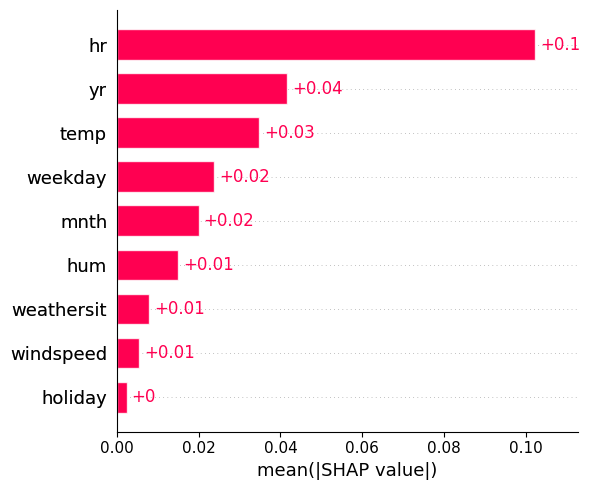

In [13]:
# SHAP Feature Importance
exp.model_explain(model='XGBoost', show='shap_fi', sample_size=500, figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

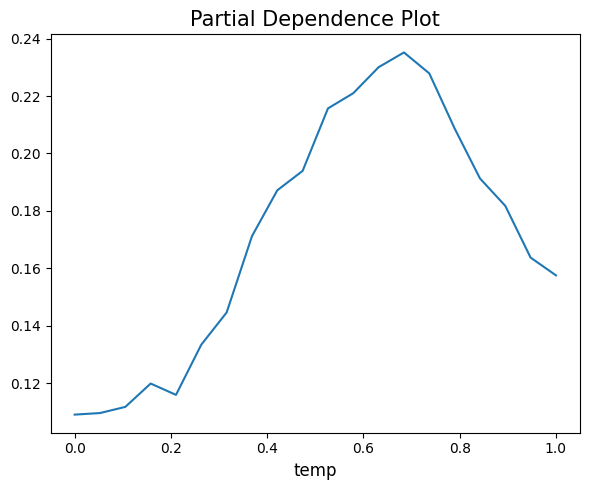

In [14]:
# PDP
exp.model_explain(model='XGBoost', show='pdp', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

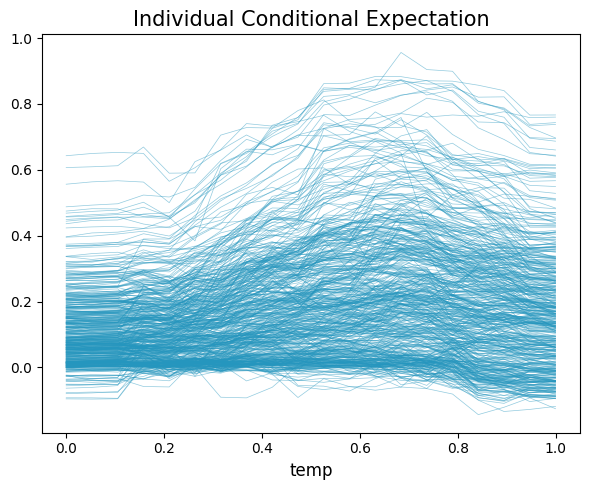

In [15]:
# ICE
exp.model_explain(model='XGBoost', show='ice', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

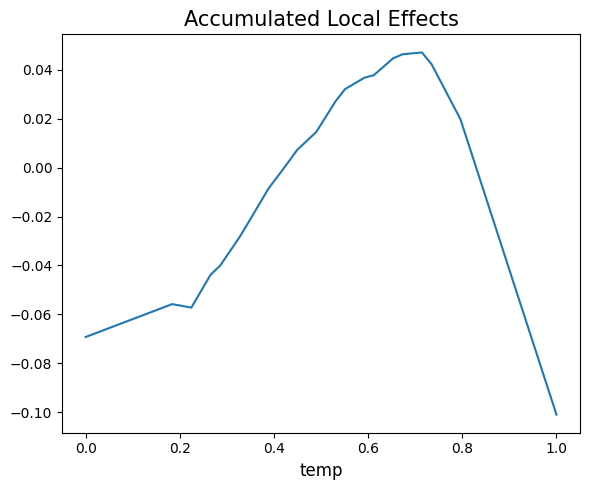

In [16]:
# ALE
exp.model_explain(model='XGBoost', show='ale', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

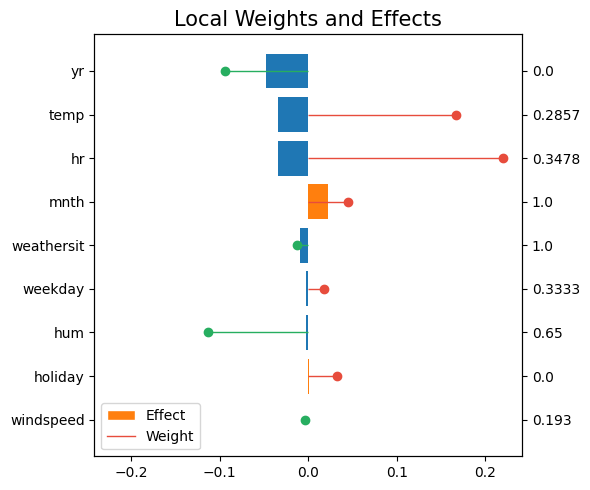

In [31]:
# Local - LIME
exp.model_explain(model='XGBoost', show='lime', sample_id=1, figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

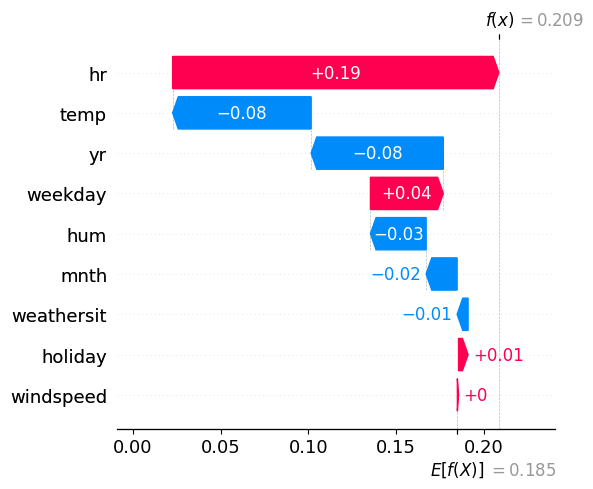

In [32]:
# Local - SHAP (TreeSHAP)
exp.model_explain(model='XGBoost', show='shap_waterfall', sample_id=1, figsize=(6, 5))

## Example 2: DNN Model

In [19]:
from sklearn.neural_network import MLPRegressor

exp.model_train(MLPRegressor(hidden_layer_sizes=[100] * 4, activation="relu", random_state=0), name='MLP')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

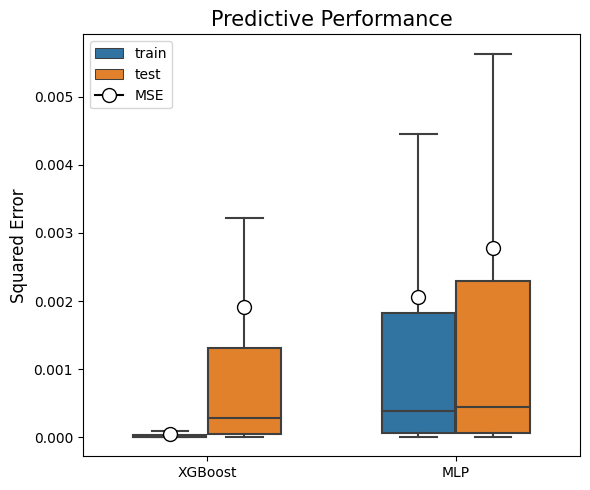

In [29]:
# Check model performance
exp.model_compare(models=['XGBoost', 'MLP'], show="accuracy_plot", figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

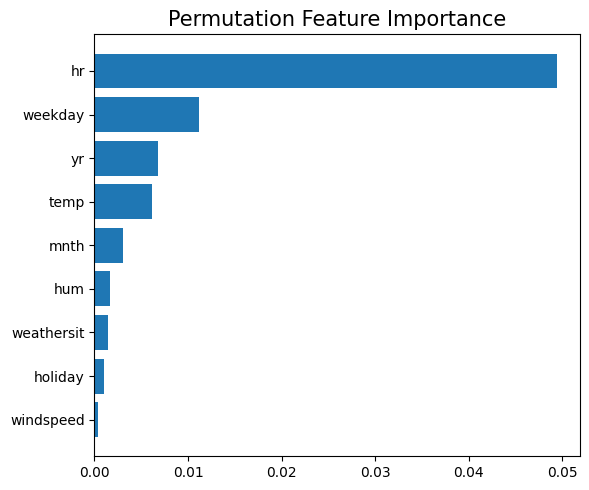

In [21]:
# Permutation Feature Importance
exp.model_explain(model='MLP', show='pfi', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

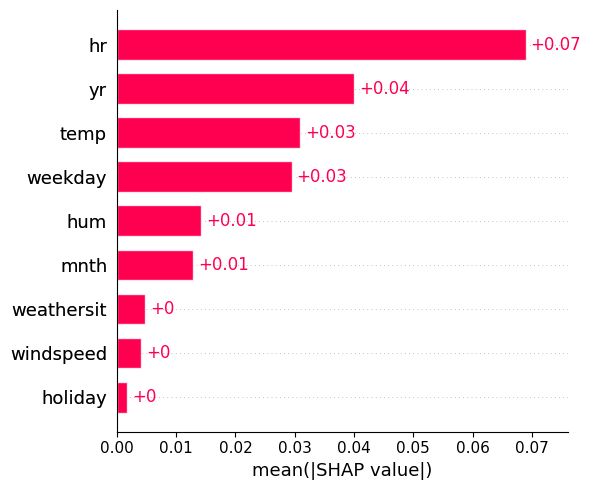

In [22]:
# SHAP Feature Importance
exp.model_explain(model='MLP', show='shap_fi', sample_size=10, figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

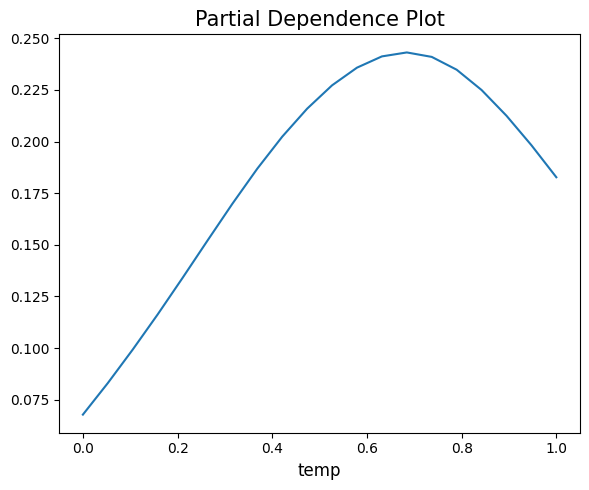

In [23]:
# PDP
exp.model_explain(model='MLP', show='pdp', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

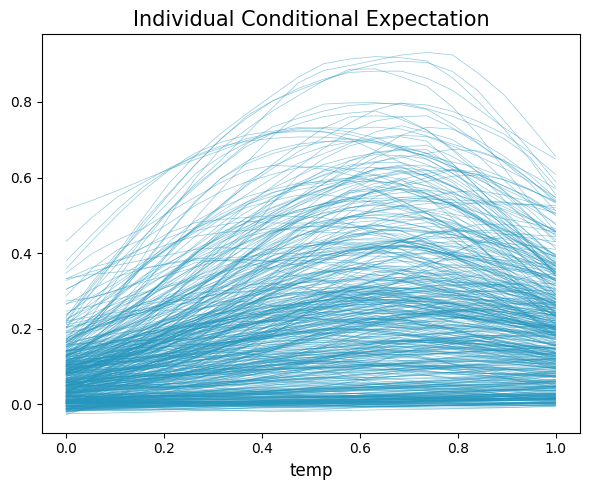

In [24]:
# ICE
exp.model_explain(model='MLP', show='ice', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

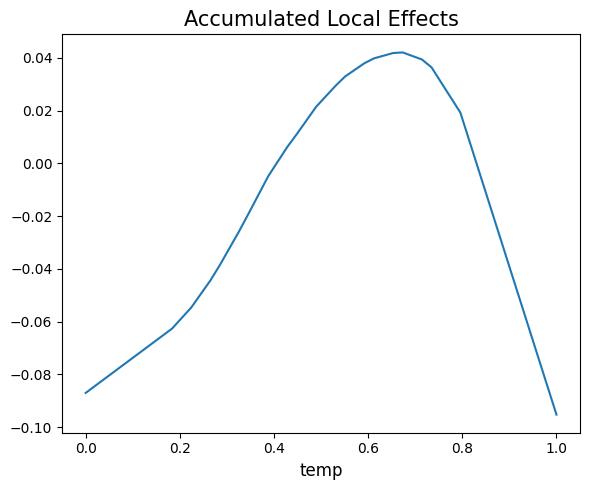

In [25]:
# ALE
exp.model_explain(model='MLP', show='ale', uni_feature='temp', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

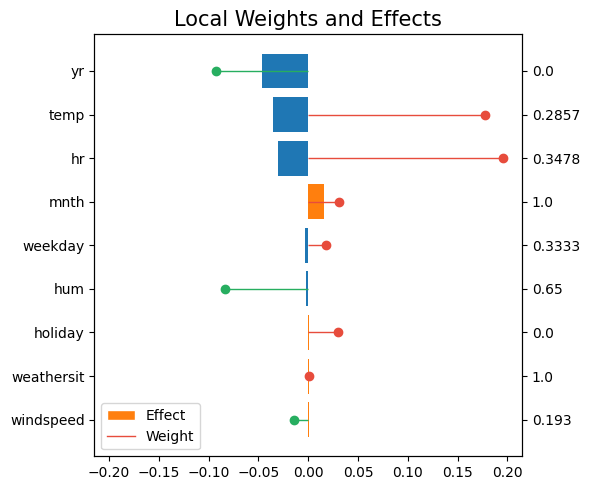

In [26]:
# Local - LIME
exp.model_explain(model='MLP', show='lime', sample_id=1, figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

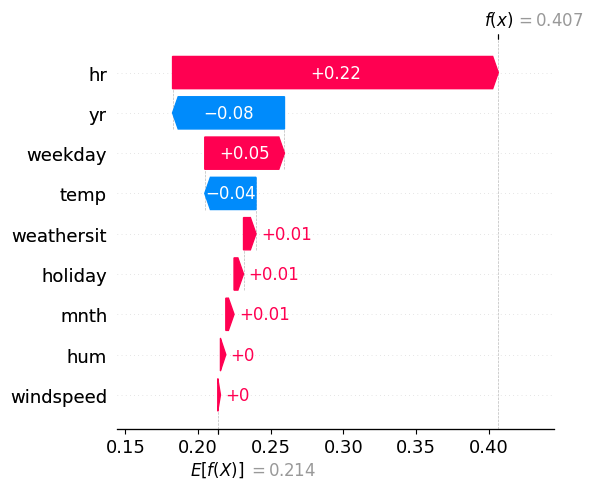

In [27]:
# Local - LIME (KernelSHAP)
exp.model_explain(model='MLP', show='shap_waterfall', sample_id=1, figsize=(6, 5))

# FANOVA-Intepretable models: GAMI-Net and EBM



In [28]:
# Choose EBM and GAMI-Net
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [33]:
# Choose EBM
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [34]:
# Choose GAMI-Net
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [35]:
# Choose GAMI-Net or EBM to compare Post-hoc explain results
#   local: sample_id=0 check rank-order/mangitude
#  global: FI (weakday), Effect plots (hr, hr x weekday)
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Compare/Diagnose/Explain

In [36]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [37]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [38]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Appendix - High-code Automation

## Load and Prepare Data

In [39]:
# Choose BikeSharing
exp.data_loader(data='BikeSharing')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

season   yr  mnth    hr  holiday  weekday  workingday  weathersit  \
0         1.0  0.0   1.0   0.0      0.0      6.0         0.0         1.0   
1         1.0  0.0   1.0   1.0      0.0      6.0         0.0         1.0   
2         1.0  0.0   1.0   2.0      0.0      6.0         0.0         1.0   
3         1.0  0.0   1.0   3.0      0.0      6.0         0.0         1.0   
4         1.0  0.0   1.0   4.0      0.0      6.0         0.0         1.0   
...       ...  ...   ...   ...      ...      ...         ...         ...   
17374     1.0  1.0  12.0  19.0      0.0      1.0         1.0         2.0   
17375     1.0  1.0  12.0  20.0      0.0      1.0         1.0         2.0   
17376     1.0  1.0  12.0  21.0      0.0      1.0         1.0         1.0   
17377     1.0  1.0  12.0  22.0      0.0      1.0         1.0         1.0   
17378     1.0  1.0  12.0  23.0      0.0      1.0         1.0         1.0   

       temp   atemp   hum  windspeed    cnt  
0      0.24  0.2879  0.81     0.0000   16.0  
1      0.22  0.2727  0.80     0.0000   40.0  
2      0.22  0.2727  0.80     0.0000   32.0  
3      0.24  0.2879  0.75     0.0000   13.0  
4      0.24  0.2879  0.75     0.0000    1.0  
...     ...     ...   ...        ...    ...  
17374  0.26  0.2576  0.60     0.1642  119.0  
17375  0.26  0.2576  0.60     0.1642   89.0  
17376  0.26  0.2576  0.60     0.1642   90.0  
17377  0.26  0.2727  0.56     0.1343   61.0  
17378  0.26  0.2727  0.65     0.1343   49.0  

[17379 rows x 13 columns]

In [40]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary(feature_type={}, feature_exclude=["season", "workingday", "atemp"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(17379, 13)')

In [41]:
# exp.data_prepare() #Low-code
exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Config                        Value
0            Excluded columns  [season, workingday, atemp]
1             Target variable                          cnt
2               Sample weight                         None
3                   Task type                   Regression
4                Split method                       Random
5                  Test ratio                          0.2
6                Random state                            0
7  Train test energy distance                     0.000404

## Train Black-box Models

In [44]:
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=7, n_estimators=500)
pipeline = exp.model_train(model=model, name='XGBoost')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [45]:
from sklearn.neural_network import MLPRegressor

exp.model_train(MLPRegressor(hidden_layer_sizes=[100]*4, activation="relu", random_state=0), name='MLP')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Comparison and Benchmarking

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

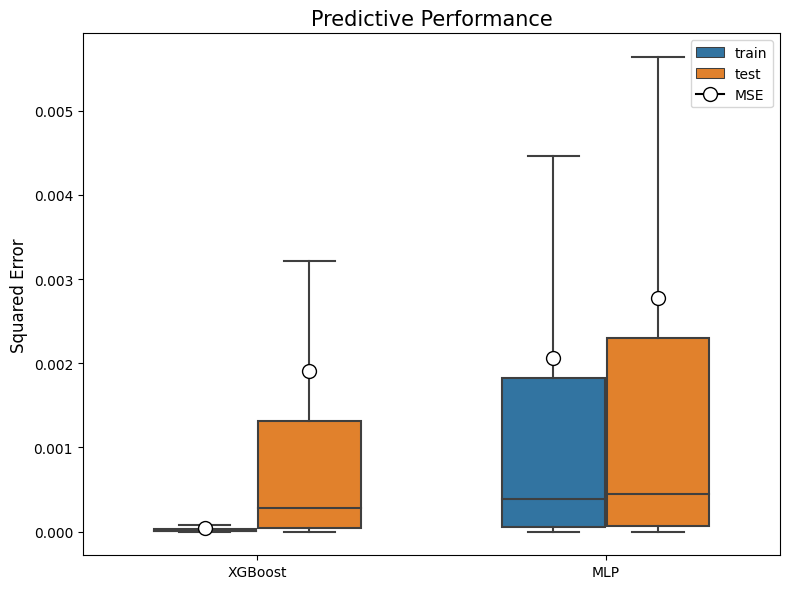

In [49]:
exp.model_compare(models=['XGBoost', 'MLP'], show='accuracy_plot')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

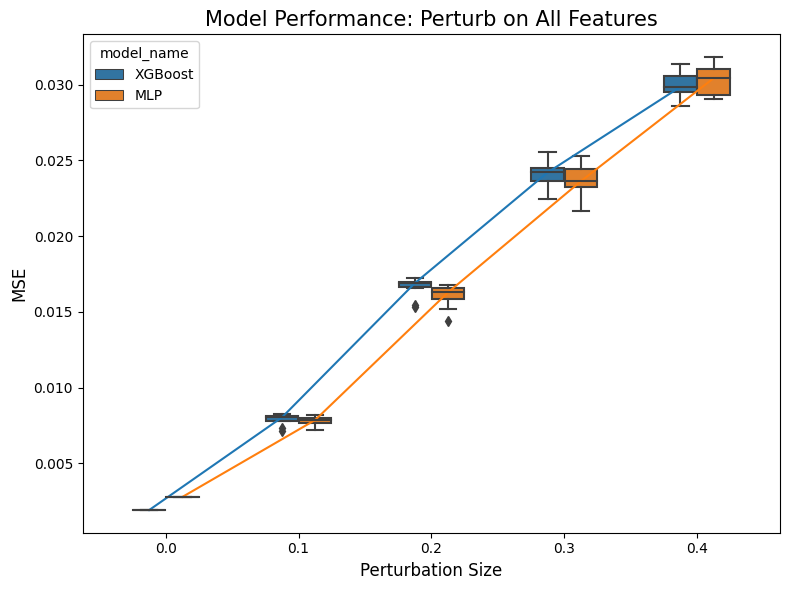

In [50]:
exp.model_compare(models=['XGBoost', 'MLP'], show='robustness_perf')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

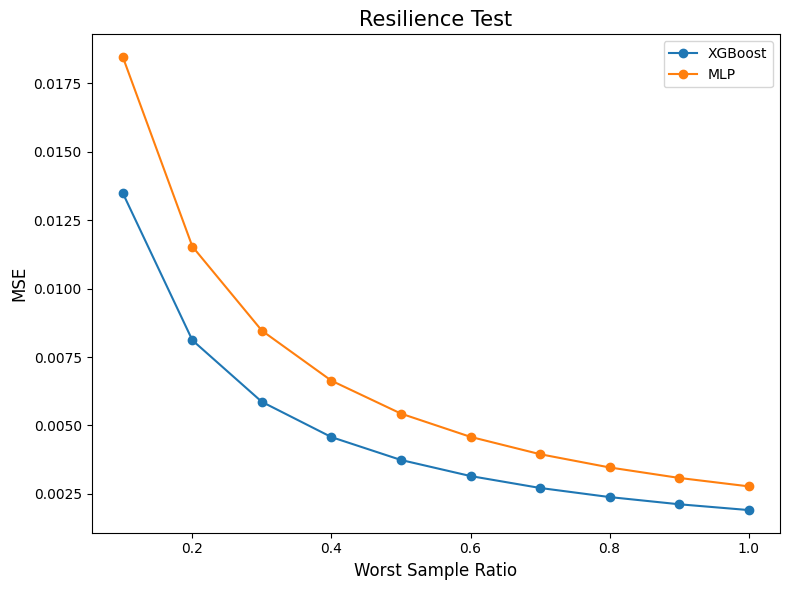

In [51]:
exp.model_compare(models=['XGBoost', 'MLP'], show='resilience_perf', alpha=0.2)